### prepare

In [1]:
# import
# pip3 install -U scikit-learn
# sudo pacman -S python-scikit-learn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

# data
x_data = np.array([[ 1.27305],[ 1.30392],[ 1.34063],[ 1.38482],[ 1.43878],[ 1.50577],[ 1.59061],[ 1.70066],[ 1.84776],[ 2.05185],[ 2.34924],[ 2.81181],[ 3.60117],[ 5.14998]])
y_data = np.array([[ 1.34714],[ 1.41808],[ 1.47987],[ 1.55098],[ 1.62026],[ 1.69219],[ 1.76749],[ 1.83998],[ 1.91347],[ 1.98128],[ 2.04018],[ 2.08743],[ 2.12260],[ 2.14005]])
x_data = MinMaxScaler().fit_transform(x_data)
y_data = MinMaxScaler().fit_transform(y_data)

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (14, 1)
y shape is  (14, 1)


### show

In [2]:
x_data[::1]

array([[0.        ],
       [0.00796249],
       [0.01743132],
       [0.02882951],
       [0.04274774],
       [0.06002688],
       [0.08191017],
       [0.11029603],
       [0.14823843],
       [0.20088059],
       [0.27758819],
       [0.39690167],
       [0.60050607],
       [1.        ]])

In [8]:
y_data[::1]

array([[0.        ],
       [0.08946791],
       [0.16739605],
       [0.25707836],
       [0.34445271],
       [0.43516919],
       [0.53013583],
       [0.62155856],
       [0.71424247],
       [0.7997629 ],
       [0.87404623],
       [0.93363686],
       [0.97799246],
       [1.        ]])

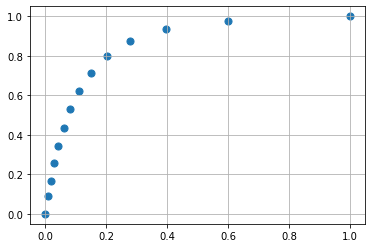

<Figure size 432x288 with 0 Axes>

In [3]:
# plot
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

### model

In [4]:
# roberto
n_features = x_data.shape[1]
inputs  = keras.Input(shape=(n_features,))
dense   = keras.layers.Dense(512, activation="relu")
x       = dense(inputs)
x       = keras.layers.Dense(256, activation="relu")(x)
x       = keras.layers.Dense(128, activation="relu")(x)
x       = keras.layers.Dense(64, activation="relu")(x)
x       = keras.layers.Dense(16, activation="relu")(x)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 512)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17    

2022-08-21 09:44:34.170078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 09:44:34.202660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 09:44:34.202813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 09:44:34.203356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

### train

In [5]:
# 30,64
model.fit(x_data, y_data, batch_size=64, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 475ms/step - loss: 0.4162
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3697
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 0.3295
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1964
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1061
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0772
Epoch 13/300
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 106/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 112/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 113/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 114/300
1/1 [==============================] - 0s 3ms/step - loss: 9.2780e-04
Epoch 115/300
1/1 [==============================] - 0s 2ms/step - loss: 8.3330e-04
Epoch 116/300
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 3.9398e-05
Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9243e-05
Epoch 204/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9103e-05
Epoch 205/300
1/1 [==============================] - 0s 2ms/step - loss: 3.8952e-05
Epoch 206/300
1/1 [==============================] - 0s 2ms/step - loss: 3.8792e-05
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 3.8642e-05
Epoch 208/300
1/1 [==============================] - 0s 1ms/step - loss: 3.8497e-05
Epoch 209/300
1/1 [==============================] - 0s 2ms/step - loss: 3.8335e-05
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 3.8208e-05
Epoch 211/300
1/1 [==============================] - 0s 2ms/step - loss: 3.8104e-05
Epoch 212/300
1/1 [==============================] - 0s 2ms/step - loss: 3.7987e-05
Epoch 213/300
1/1 [==============================] - 0s 2ms/step - loss: 3.7834e-05
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 2.8934e-05
Epoch 300/300
1/1 [==============================] - 0s 2ms/step - loss: 3.0242e-05


### predict

1/1 [==============================] - 0s 104ms/step


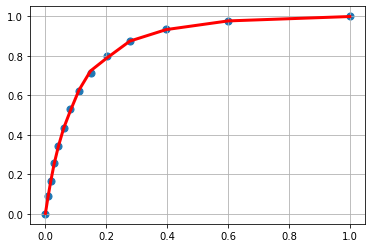

In [6]:
# from input
y_predicted = model.predict(x_data)

# plot
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.plot(x_data, y_predicted, 'r', linewidth=3)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

### video


In [7]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

